# PROJET 10 : DETECTEZ LES FAUX BILLETS AVEC R OU PYTHON

Nous sommes une entreprise fran√ßaise sp√©cialis√©e dans la data, ayant d√©croch√© une prestation en r√©gie au sein de l‚ÄôOrganisation nationale de lutte contre le faux-monnayage (ONCFM).

Le but de l'analyse est de d√©terminer le type de chacun des billets √† partir des dimensions.

2 grands axes de travail :

- Utiliser la r√©gression lin√©aire multiple pour remplir les valeurs manquantes
- Utiliser la R√©gression logistique pour pr√©dire le type de billet.


## 1.Importation des librairies et de la table de donn√©es

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import seaborn as sns

# Librairies statistiques et graphiques:

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation des donn√©es

billets = pd.read_csv("billets.csv", sep=';')
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

## 2.Analyse exploratoire

Les variables :

is_genuine : la nature du billet: True pour un vrai billet et False pour un faux billet

diagonal : la diagonale du billet (en mm)

height_left : la hauteur du billet (mesur√©e sur le c√¥t√© gauche, en mm)

height_right : la hauteur du billet (mesur√©e sur le c√¥t√© droit, en mm)

margin_low : la marge entre le bord inf√©rieur du billet et l'image de celui-ci (en mm)

margin_up : la marge entre le bord sup√©rieur du billet et l'image de celui-ci (en mm)

length : la longueur du billet (en mm)




### 2.1. Variables individuelles

In [3]:
# Informations sur les variables

billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
# Valeurs manquantes ?

billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [5]:
# Description des variables

billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [6]:
# Nombre de vrais billets et de faux billets

billets['is_genuine'].value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

In [7]:
# Valeurs manquantes dans "True" et dans "False"?

billets.loc[(billets['margin_low'].isna()),:'is_genuine'].value_counts()


is_genuine
True          29
False          8
Name: count, dtype: int64

In [8]:
# Pr√©sence des doublons  ?

billets.duplicated().sum()

0

### 2.2.Repr√©sentations graphiques g√©n√©rales

<Axes: ylabel='count'>

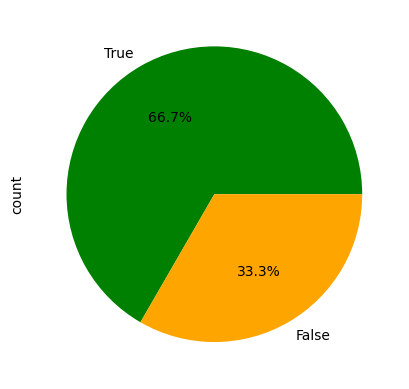

In [9]:
# Graphique

colors = ( "green", "orange")
billets["is_genuine"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors )

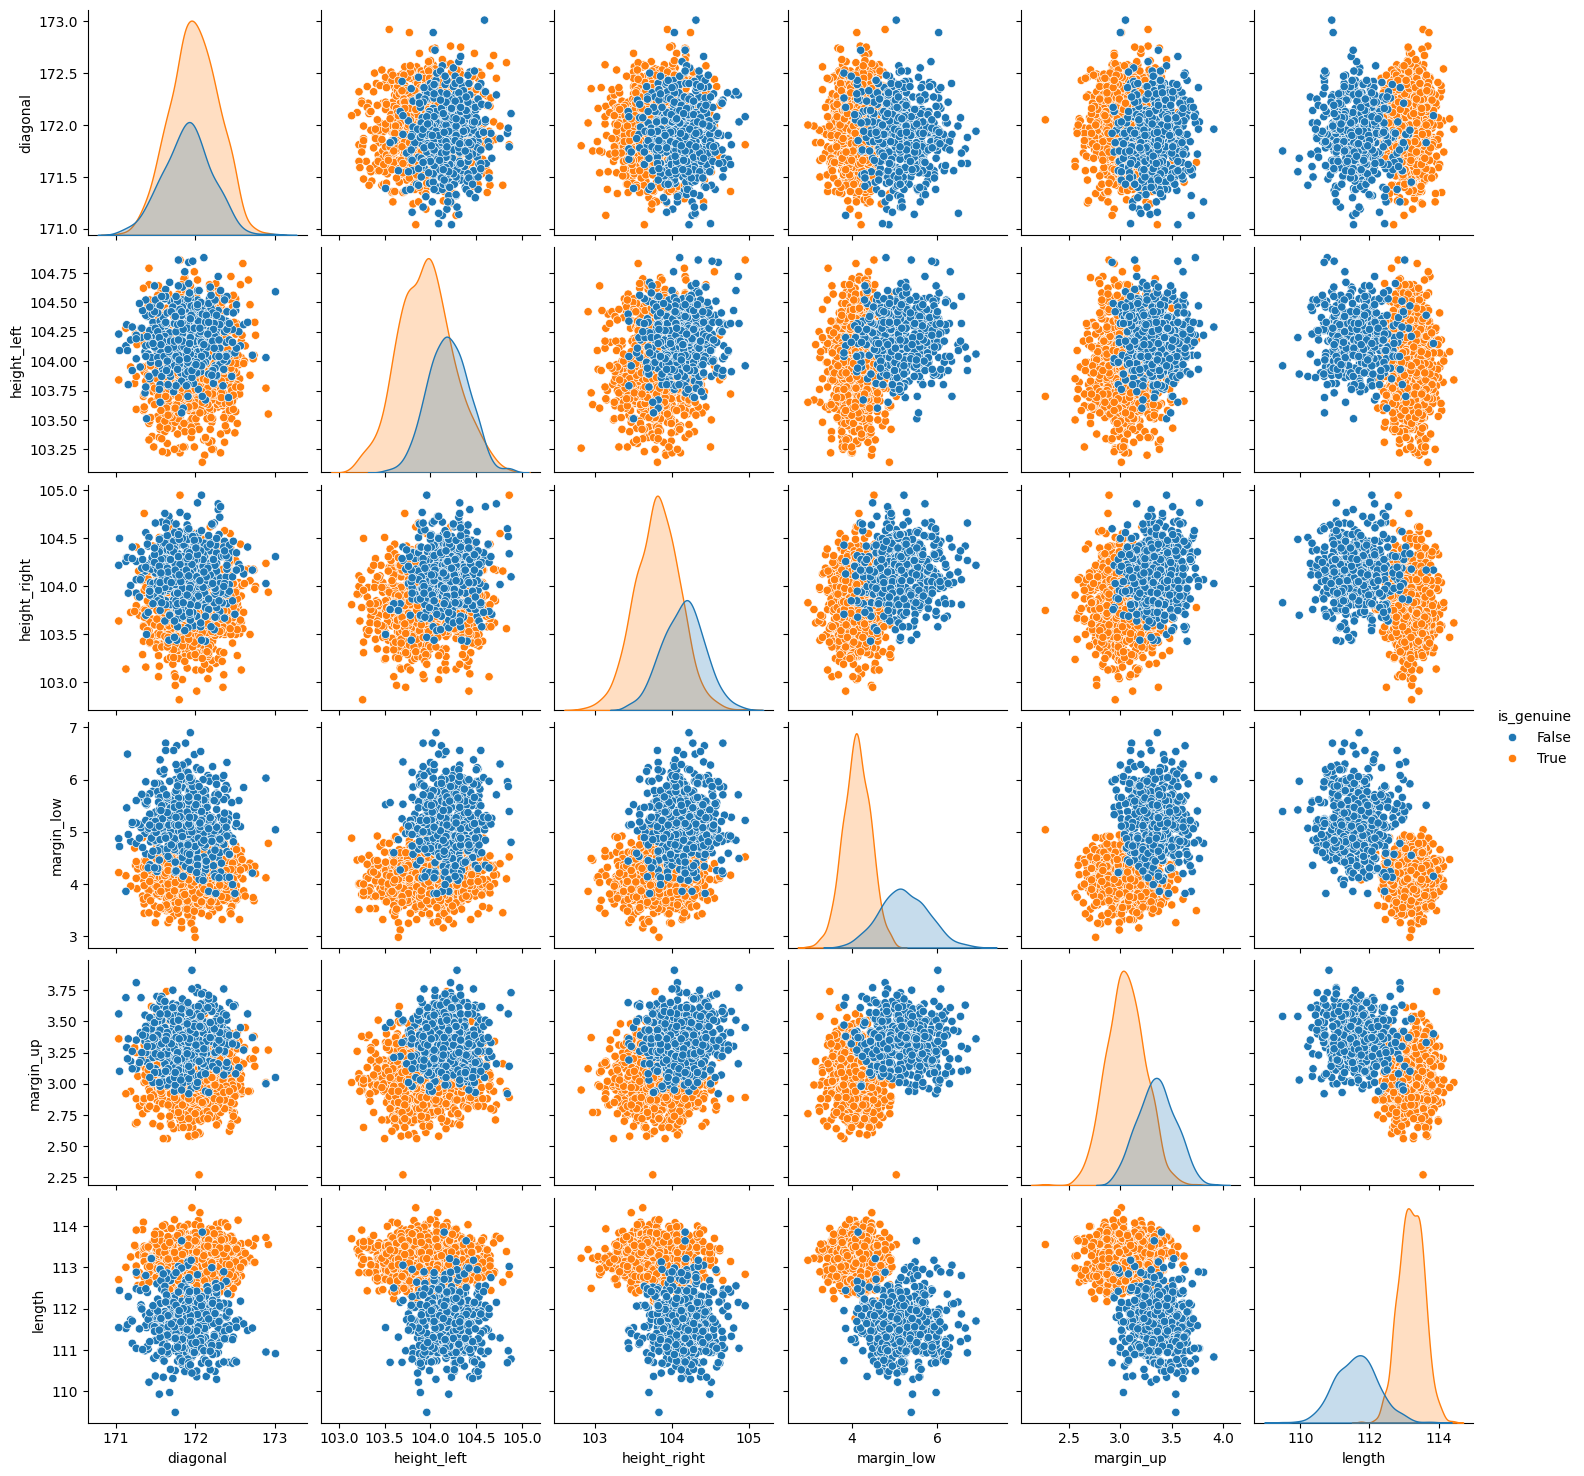

In [10]:
# Repr√©sentations graphiques

sns.pairplot(billets, hue = 'is_genuine')

### 2.3. Distributions des variables

In [11]:
# df avec les vrais billets

vrais = billets.loc[billets['is_genuine'] == True]
vrais.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  971.000000  1000.00000   
mean    171.987080   103.949130     103.80865    4.116097     3.05213   
std       0.300441     0.300231       0.29157    0.319124     0.18634   
min     171.040000   103.140000     102.82000    2.980000     2.27000   
25%     171.790000   103.740000     103.61000    3.905000     2.93000   
50%     171.990000   103.950000     103.81000    4.110000     3.05000   
75%     172.200000   104.140000     104.00000    4.340000     3.18000   
max     172.920000   104.860000     104.95000    5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

In [12]:
# df avec les vrais billets

faux = billets.loc[billets['is_genuine'] == False]
faux.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  492.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.215935    3.350160   
std      0.306861     0.223758      0.270878    0.553531    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.332500    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

In [13]:
# Distribution de la variable "diagonal"

from scipy.stats import norm

# Figure
fig = go.Figure()

# Courbe de Gauss vrai_billet
xv = np.linspace(171,173)
mean_v = np.mean(vrais['diagonal'])
std_v = np.std(vrais['diagonal'])
yv = norm.pdf(xv, mean_v, std_v)*50
fig.add_trace(go.Scatter(x=xv, y=yv, name='Courbe de Gauss True'))

# Courbe de Gauss faux_billet
xf = np.linspace(171,173.05)
mean_f = np.mean(faux['diagonal'])
std_f = np.std(faux['diagonal'])
yf = norm.pdf(xf, mean_f, std_f)*25
fig.add_trace(go.Scatter(x=xf, y=yf, name='Courbe de Gauss False'))

# Histogramme
fig.add_trace(go.Histogram(x=vrais['diagonal'], name='True'))
fig.add_trace(go.Histogram(x=faux['diagonal'], name='False'))

# Titres et visuel
fig.update_layout(title='Graphique 3: Distribution de la variable diagonal')

fig.update_traces(opacity=0.75)
fig.show()

In [14]:
# Distribution de la variable "height_left":

# Figure
fig = go.Figure()

# Courbe de Gauss vrai_billet
xv = np.linspace(103,105)
mean_v = np.mean(vrais['height_left'])
std_v = np.std(vrais['height_left'])
yv = norm.pdf(xv, mean_v, std_v)*50
fig.add_trace(go.Scatter(x=xv, y=yv, name='Courbe de Gauss True'))

# Courbe de Gauss faux_billet
xf = np.linspace(103,105)
mean_f = np.mean(faux['height_left'])
std_f = np.std(faux['height_left'])
yf = norm.pdf(xf, mean_f, std_f)*25
fig.add_trace(go.Scatter(x=xf, y=yf, name='Courbe de Gauss False'))

# Histogramme
fig.add_trace(go.Histogram(x=vrais['height_left'], name='True'))
fig.add_trace(go.Histogram(x=faux['height_left'], name='False'))

# Titres et visuel
fig.update_layout(title='Graphique 4 : Distribution de la variable height_left')

fig.update_traces(opacity=0.75)
fig.show()

In [15]:
# Distribution de la variable "height_right"

from scipy.stats import norm

# Figure
fig = go.Figure()

# Courbe de Gauss vrai_billet
xv = np.linspace(103,105)
mean_v = np.mean(vrais['height_right'])
std_v = np.std(vrais['height_right'])
yv = norm.pdf(xv, mean_v, std_v)*50
fig.add_trace(go.Scatter(x=xv, y=yv, name='Courbe de Gauss True'))

# Courbe de Gauss faux_billet
xf = np.linspace(103,105)
mean_f = np.mean(faux['height_right'])
std_f = np.std(faux['height_right'])
yf = norm.pdf(xf, mean_f, std_f)*25
fig.add_trace(go.Scatter(x=xf, y=yf, name='Courbe de Gauss False'))

# Histogramme
fig.add_trace(go.Histogram(x=vrais['height_right'], name='True'))
fig.add_trace(go.Histogram(x=faux['height_right'], name='False'))

# Titres et visuel
fig.update_layout(title='Graphique 5 : Distribution de la variable height_right')

fig.update_traces(opacity=0.75)
fig.show()

In [16]:
# Distribution de la variable "margin_low":

# Figure
fig = go.Figure()

# Courbe de Gauss vrai_billet
xv = np.linspace(2.9,5.05)
mean_v = np.mean(vrais['margin_low'])
std_v = np.std(vrais['margin_low'])
yv = norm.pdf(xv, mean_v, std_v)*100
fig.add_trace(go.Scatter(x=xv, y=yv, name='Courbe de Gauss True'))

# Courbe de Gauss faux_billet
xf = np.linspace(3.8,6.90)
mean_f = np.mean(faux['margin_low'])
std_f = np.std(faux['margin_low'])
yf = norm.pdf(xf, mean_f, std_f)*50
fig.add_trace(go.Scatter(x=xf, y=yf, name='Courbe de Gauss False'))

# Histogramme
fig.add_trace(go.Histogram(x=vrais['margin_low'], name='True'))
fig.add_trace(go.Histogram(x=faux['margin_low'], name='False'))

# Titres et visuel
fig.update_layout(title='Graphique 6 : Distribution de la variable margin_low')

fig.update_traces(opacity=0.75)
fig.show()

In [17]:
# Distribution de la variable "margin_up":

# Figure
fig = go.Figure()

# Courbe de Gauss vrai_billet
xv = np.linspace(2.25,3.75)
mean_v = np.mean(vrais['margin_up'])
std_v = np.std(vrais['margin_up'])
yv = norm.pdf(xv, mean_v, std_v)*50
fig.add_trace(go.Scatter(x=xv, y=yv, name='Courbe de Gauss True'))

# Courbe de Gauss faux_billet
xf = np.linspace(2.9,3.95)
mean_f = np.mean(faux['margin_up'])
std_f = np.std(faux['margin_up'])
yf = norm.pdf(xf, mean_f, std_f)*25
fig.add_trace(go.Scatter(x=xf, y=yf, name='Courbe de Gauss False'))

# Histogramme
fig.add_trace(go.Histogram(x=vrais['margin_up'], name='True'))
fig.add_trace(go.Histogram(x=faux['margin_up'], name='False'))

# Titres et visuel
fig.update_layout(title='Graphique 7 : Distribution de la variable margin_up')

fig.update_traces(opacity=0.75)
fig.show()

In [18]:
# Distribution de la variable "length":

# Figure
fig = go.Figure()

# Courbe de Gauss df_vrai_billets:
xv = np.linspace(111.75,114.45)
mean_v = np.mean(vrais['length'])
std_v = np.std(vrais['length'])
yv = norm.pdf(xv, mean_v, std_v)*100
fig.add_trace(go.Scatter(x=xv, y=yv, name='Courbe de Gauss True'))

# Courbe de Gauss df_faux_billets:
xf = np.linspace(109.45,113.9)
mean_f = np.mean(faux['length'])
std_f = np.std(faux['length'])
yf = norm.pdf(xf, mean_f, std_f)*50
fig.add_trace(go.Scatter(x=xf, y=yf, name='Courbe de Gauss False'))

# Histogramme
fig.add_trace(go.Histogram(x=vrais['length'], name='True'))
fig.add_trace(go.Histogram(x=faux['length'], name='False'))

# Titres et visuel
fig.update_layout(title='Graphique 8 : Distribution de la variable length')

fig.update_traces(opacity=0.75)
fig.show()

### 2.4. Matrice de corr√©lation

Text(0.5, 1.0, 'Graphique 9 : Corr√©lation entre les variables')

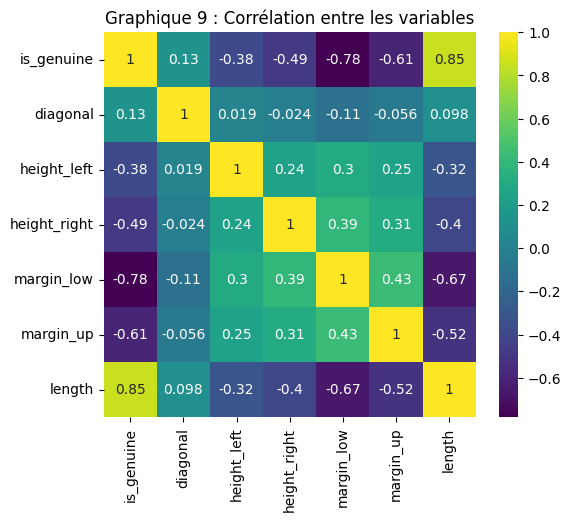

In [19]:
# Carte de chaleur / Heatmap/ Matrice de corr√©lations entre les variables

plt.figure(figsize=(6, 5))
sns.heatmap(billets.corr(), cmap = 'viridis', annot = True)
plt.title('Graphique 9 : Corr√©lation entre les variables')

On observe que "margin_low" est :

- Tr√®s n√©gativement correl√© avec "is_geniune"
- Positivement correl√© avec "margin_up"
- N√©gativement corr√©l√© avec "length"

Faisons une repr√©sentation graphique en nuages de points, on voit mieux les corr√©lations entre ces variables, avec le type de billet bien repr√©sent√©.

### 2.5. Visualisation des variabes correl√©es



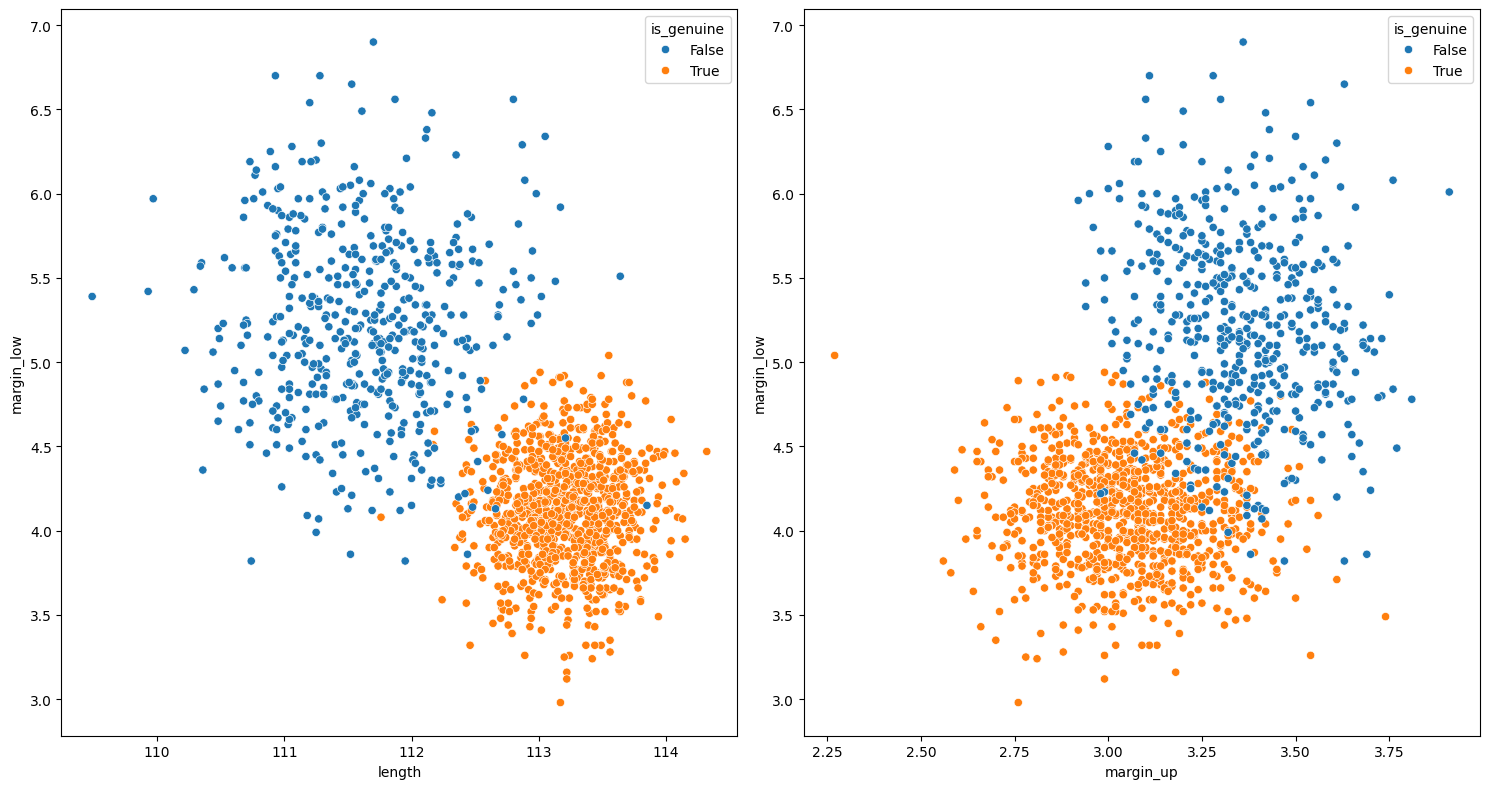

In [20]:
# Nuage de points de 'margin_low' en fonction des variables correl√©es /10
# Repr√©sentation graphique le nuage de points 'margin_low' en fonction de 'length' et 'margin_up'

f, axs = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot(data= billets, x='length', y='margin_low', hue='is_genuine', ax=axs[0])
sns.scatterplot(data=billets, x='margin_up', y='margin_low', hue='is_genuine', ax=axs[1])
f.tight_layout()
plt.show()

Ces 2 graphiques des nuages de points donnent une tendance ou un alignement proche d'une droite descendante avec peu d'erreurs pour l'un et montante.

## 3.Travail pr√©liminaire

### 3.1 S√©paration des donn√©es en 2 dataframes disctincts (sans VM et avec VM)


In [21]:
# Nouveau DataFrame sans valeurs manquantes (NaN)

billets_sansvm = billets.dropna()
billets_sansvm.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [22]:
# Nouveau DataFrame avec valeurs manquantes (NaN)

billets_avecvm = billets[billets['margin_low'].isna()]
billets_avecvm.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

### 3.2 Retrait des variables non significatives (m√©thode backward)

In [23]:
# M√©thode Backward automatique sur "billets_sansvm"

# Code du cours d'OpenClassroom (TP 2 : Pratiquez la r√©gression lin√©aire multiple sur le jeu de donn√©es de l'ozone)

def backward_selected(data, response):

    remaining = set(data._get_numeric_data().columns)
    if response in remaining:
        remaining.remove(response)
    cond = True

    while remaining and cond:
        formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
        print('_______________________________')
        print(formula)
        model = smf.ols(formula, data).fit()
        score = model.pvalues[1:]
        toRemove = score[score == score.max()]
        if toRemove.values > 0.05:
            print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
            remaining.remove(toRemove.index[0])
        else:
            cond = False
            print('is the final model !')
        print('')
    print(model.summary())

    return model

In [24]:
columns = ['margin_low', 'is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']
reg_backward = backward_selected(billets_sansvm[columns], 'margin_low')

_______________________________
margin_low ~ margin_up + diagonal + height_left + height_right + is_genuine + length + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ margin_up + diagonal + height_left + height_right + is_genuine + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ margin_up + height_left + height_right + is_genuine + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ margin_up + height_left + is_genuine + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ margin_up + is_genuine + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                

In [25]:
# Ou encore r√©gresser lin√©airement 'margin_low' en fonction des autres variables

reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_sansvm).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          4.75e-299
Time:                        07:46:03   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

In [26]:
# Nouvelle it√©ration sans 'length'

reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          2.12e-300
Time:                        07:46:04   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

In [27]:
# Nouvelle it√©ration sans 'diagonal'

reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          8.76e-302
Time:                        07:46:04   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

In [28]:
# Nouvelle it√©ration sans 'height_right'

reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          3.63e-303
Time:                        07:46:04   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

In [29]:
# Nouvelle it√©ration sans 'height_left'

reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          1.24e-304
Time:                        07:46:04   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

R2 et R2 ajust√© gardent la m√™me valeur, donc le retrait de ces variables non significatives ne changent rien au mod√®le.
A pr√©sent, utilisons donc notre df sans VM pour entra√Æner le mod√®le, pour par la suite pr√©dire les VM sur le 2e df avec VM.

### 3.3 V√©rification des conditions d'application de la r√©gression lin√©aire multiple

In [30]:
# Les variables pr√©dictives

x_train = billets_sansvm.drop("margin_low", axis=1)
y_train = billets_sansvm["margin_low"]

#### a. La colin√©arit√©

Calcul des facteurs d'inflation de la variance (VIF) :

Toute variable avec un VIF sup√©rieur √† 10 indique une forte colin√©arit√© avec les autres variables explicatives.


In [31]:
# Test statistique ( VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007746]

Ici, tous les coefficients sont inf√©rieurs √† 10, il n'y a donc pas de probl√®me de colin√©arit√©.

#### b. La normalit√© des r√©sidus

Elle signifie que les erreurs sont distribu√©s sym√©triquement autour de z√©ro, sans asym√©trie ni aplatissement i.e. les r√©sidus sont distribu√©s selon la loi normale. Cette hypoth√®se implique que le mod√®le capture les principales tendances et sources de variation des donn√©es et que les erreurs sont al√©atoires et ind√©pendantes.

In [32]:
# Test de Shapiro-Wilk

from scipy.stats import shapiro

shapiro_test = shapiro(reg_multi.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.9936252795074536, pvalue=6.21444675041755e-06)


In [33]:
# Test d'Aderson-Darling

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from scipy.stats import t
from scipy.stats import norm

La p-value du test d'Aderson-Darling vaut 4.8613414248955766e-05


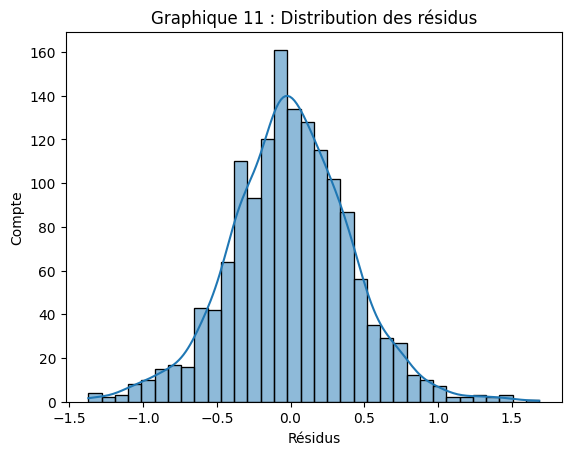

In [34]:
# Creation d'une colonne contenant les residus:

billets_sansvm["margin_low_pred"] = reg_multi.predict(x_train)
billets_sansvm["residual"] = billets_sansvm["margin_low"] - billets_sansvm["margin_low_pred"]

# Normalite:

print("La p-value du test d'Aderson-Darling vaut", normal_ad(billets_sansvm["residual"])[1])

# Graphique:
sns.histplot(billets_sansvm["residual"], kde=True)
plt.xlabel("R√©sidus")
plt.ylabel("Compte")
plt.title("Graphique 11 : Distribution des r√©sidus")
plt.show()

Ici, l'hypoth√®se de normalit√© est valid√©e (p-value < 0.05), les r√©sidus suivent une distribution normale

#### c. L'homosc√©dasticit√©

Le test statistique de White permet de v√©rifier si la variance des erreurs d'un mod√®le de r√©gression est constante pour toutes les valeurs des variables independantes.V√©rifi√© si p-value < 5%


{'Test Statistic': 166.92896597830782, 'p-value': 4.769905016348369e-35, 'F-Statistic': 46.946198550777005, 'F-Test p-value': 3.7024551237822514e-37}


Text(0.5, 1.0, 'Graphique 12 : Homosc√©dasticit√©')

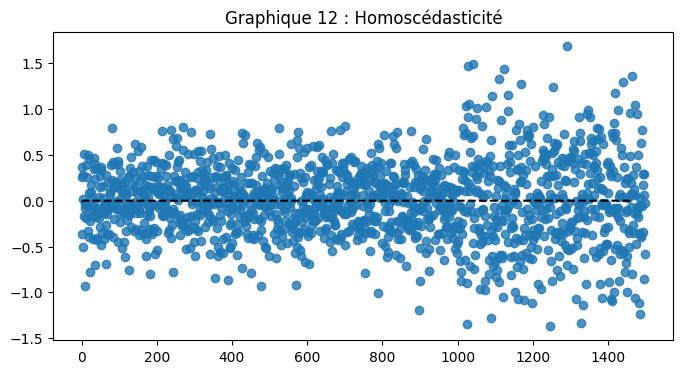

In [35]:
# Homoscedasticite : Test de White

from statsmodels.stats.diagnostic import het_white

reg_multi.resid
white_test = het_white(reg_multi.resid, reg_multi.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

# Graphique:
plt.subplots(figsize=(8, 4))
plt.scatter(x=billets_sansvm.index, y=billets_sansvm["residual"], alpha=0.8)
plt.plot(np.repeat(0, len(billets_sansvm.index)+2), color="black", linestyle='--')
plt.title("Graphique 12 : Homosc√©dasticit√©")

L'hypoth√®se d'homosc√©dasticit√© de notre r√©gression lin√©aire est donc consid√©r√©e comme v√©rifi√©e puisque p-valeur ici est tr√®s inf√©rieure √†  5 %.
La constance de la variance des r√©sidus peut √™tre √©valu√©e par un nuage de point des r√©sidus en fonctions des valeurs pr√©dites. Ce nuage de points ne doit pas avoir de forme particuli√®re, c'est √† dire des r√©sidus homog√®nes autour de z√©ro (g√©n√©ralement compris entre -2 et 2). c'est bien le cas ici !




#### d. L'ind√©pendance des erreurs


Hypoth√®se fondamentale dans les mod√®les de r√©gression lin√©aire, elle stipule que les erreurs de pr√©diction doivent √™tre ind√©pendantes les unes des autres. Autrement dit, l'erreur associ√©e √† une observation ne doit pas √™tre corr√©l√©e avec l'erreur associ√©e √† une autre observation : les erreurs doivent √™tre ind√©pendantes les unes des autres.

Si les erreurs ne sont pas ind√©pendantes, les p-valeurs peuvent √™tre incorrectes, ce qui peut conduire √† des conclusions erron√©es.

Les pr√©dictions bas√©es sur le mod√®le de r√©gression seront plus fiables si les erreurs sont ind√©pendantes.

 A v√©rifier avec le test de Durbin Watson (les valeurs du test varient entre 0 et 4) :

Valeur proche de 0 = autocorr√©lation positive.

Valeur proche de 2 = absence d'autocorr√©lation, erreurs ind√©pendantes.

Valeur proche de 4 = autocorr√©lation n√©gative



In [36]:
# Ici, les erreurs doivent √™tre ind√©pendantes les unes des autres : test de Durbin Watson

from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(reg_multi.resid)
print(f'Statistique de Durbin-Watson: {dw_stat}')

Statistique de Durbin-Watson: 2.0410819121411503


Autour de 2 donc les erreurs sont ind√©pendantes !

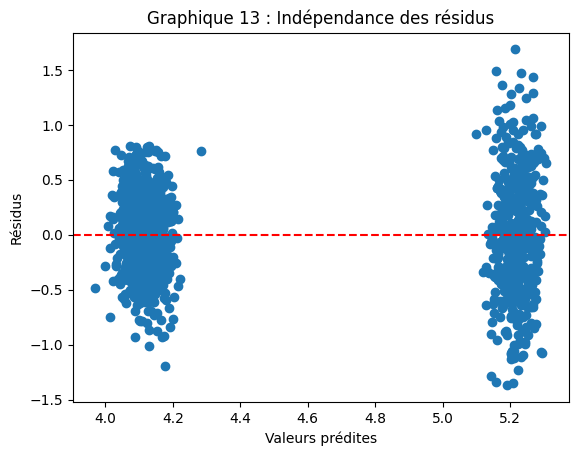

In [37]:
# Valeurs pr√©dites par le mod√®le

fitted_values = reg_multi.fittedvalues

# R√©sidus/erreurs du mod√®le

residuals = reg_multi.resid

# Trac√© du graphique des r√©sidus

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs pr√©dites')
plt.ylabel('R√©sidus')
plt.title('Graphique 13 : Ind√©pendance des r√©sidus')
plt.show()

## 4.La r√©gression lin√©aire multiple


### 4.1 Pr√©diction des valeurs manquantes de "margin_low"

#### a. Entrainement du mod√®le sur le df sans VM

In [38]:
# Pr√©dire 'margin_low' en fonction de 'is_genuine' et de 'margin_up'

# Les variables pr√©dictives

X = billets_sansvm[['is_genuine', 'margin_up']]

# La variable cible, 'margin_low'

y = billets_sansvm.margin_low

In [39]:
# Entra√Ænement du mod√®le sur les donn√©es avec la m√©thode fit
# Instancier le mod√®le

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [40]:
# Evaluation du mod√®le : on obtient un score

print(f"R^2 : {np.round(reg.score(X, y), 3)}")

R^2 : 0.617


La documentation du mod√®le  LinearRegression  indique qu'il s'agit l√† du coefficient de d√©termination R^2 qui mesure les variations de la variable cible qui sont expliqu√©es par le mod√®le. R^2 va de 0 (mauvais) √† 1 (parfait).

R^2 mesure le pouvoir de pr√©diction des variables de la r√©gression sur la variable cible, une valeur √©lev√©e indique une meilleure r√©gression.

Comme il s'agit d'une r√©gression lin√©aire, le mod√®le que nous venons d'entra√Æner s'exprime comme suit :

In [41]:
# Coefficients a et b de la r√©gression lin√©aire

print(f" margin_low = {np.round(reg.coef_[0],  2)} * is_genuine + {np.round(reg.coef_[1],  2)} * margin_up  + du bruit")

 margin_low = -1.16 * is_genuine + -0.21 * margin_up  + du bruit


#### b. Pr√©diction de 'margin_low' sur le df avec VM

In [42]:
# Predictions des VM de "margin_low"

a_prevoir = billets_avecvm[['is_genuine','margin_up']]
billets_avecvm['margin_low'] = reg_multi.predict(a_prevoir)
billets_avecvm.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45    4.074248       3.25   
99         True    171.93       104.07        104.18    4.097561       3.14   
151        True    172.07       103.80        104.38    4.122994       3.02   
197        True    171.45       103.66        103.80    3.995830       3.62   
241        True    171.83       104.14        104.06    4.122994       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

#### c. Concat√©nation des deux df

In [43]:
# DF final avec toutes les lignes

df_final = pd.concat([billets_sansvm, billets_avecvm])
df_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  margin_low_pred  residual  
0  112.83         4.150546  0.369454  
1  113.09         4.129352 -0.359352  
2  113.16         4.139949  0.260051  
3  113.51         4.125114 -0.505114  
4  112.54         4.025502  0.014498

In [44]:
# Suppression des colonnes pas tr√®s importantes

df_final = df_final.drop(columns=["margin_low_pred", "residual"])

In [45]:
# Informations sur le df concaten√©

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [46]:
# Description du df

df_final.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.482863     3.151473   
std       0.305195     0.299462      0.325627     0.659849     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.027500     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

### 4.2 Regression lin√©aire multiple sur tout le dataframe final

In [47]:
# M√©thode backward automatique

columns = ['margin_low', 'is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']
reg_backward = backward_selected(df_final[columns], 'margin_low')

_______________________________
margin_low ~ margin_up + diagonal + height_left + height_right + is_genuine + length + 1
remove length (p-value : 0.87 )

_______________________________
margin_low ~ margin_up + diagonal + height_left + height_right + is_genuine + 1
remove diagonal (p-value : 0.722 )

_______________________________
margin_low ~ margin_up + height_left + height_right + is_genuine + 1
remove height_right (p-value : 0.501 )

_______________________________
margin_low ~ margin_up + height_left + is_genuine + 1
remove height_left (p-value : 0.453 )

_______________________________
margin_low ~ margin_up + is_genuine + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1229.
Date:                F

In [48]:
reg_multi2 = smf.ols('margin_low~margin_up+is_genuine', data=df_final).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1229.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          1.45e-316
Time:                        07:46:05   Log-Likelihood:                -775.59
No. Observations:                1500   AIC:                             1557.
Df Residuals:                    1497   BIC:                             1573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Le R¬≤ ajust√© est √©gal √† 0.62, c‚Äôest le pourcentage de variation de la variable d√©pendante "margin_low" qui est expliqu√© par un mod√®le lin√©aire corrig√© par le nombre de degr√® de libert√©.

### 4.3 Analyse des r√©sultats : les hypoth√®ses √† v√©rifier

### a. Les leviers


Les leviers (leverages) sont des quantit√©s qui mesurent l'influence de chaque observation sur les pr√©dictions dans un mod√®le de r√©gression multiple.  Les valeurs de levier sont calcul√©es √† partir de la matrice de projection ùêª, en sachant que le seuil des leviers est de  2‚àóùëù/ùëõ.

In [49]:
# R√©alisation du test √† un niveau  ùõº=5 % :

alpha = 0.05

# R√©cup√©rons ùëõ, le nombre d'individus de l'√©chantillon, et ùëù, le nombre de variables :

n = df_final.shape[0]
p = 3

# Cr√©ation d'un df analyses avec une colonne 'obs'

analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

In [50]:
analyses['levier'] = reg_multi2.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

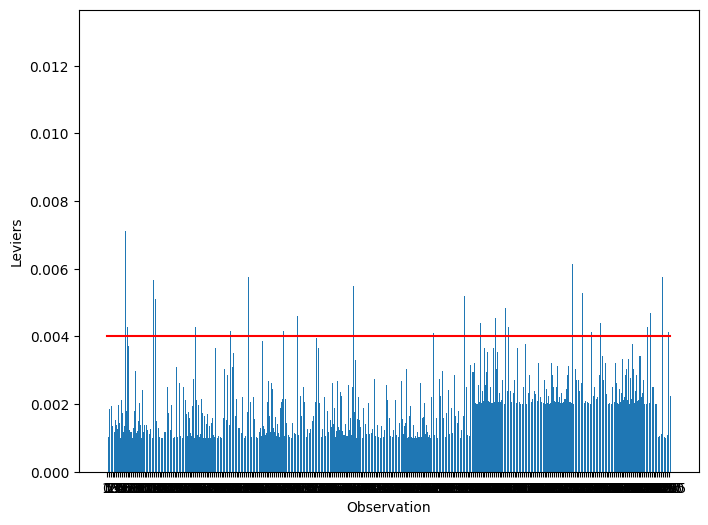

In [51]:
# Graphique 14

plt.figure(figsize=(8,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1500, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

In [52]:
# S√©lectionner les points pour lesquels le levier est sup√©rieur au seuil :

analyses.loc[analyses['levier'] > seuil_levier, :]

obs    levier
4        5  0.004594
48      49  0.007109
52      53  0.010288
54      55  0.004265
123    124  0.005672
...    ...       ...
1466  1467  0.007330
1478  1479  0.005754
1488  1489  0.005375
1494  1495  0.004140
1495  1496  0.005465

[73 rows x 2 columns]

### b. Les r√©sidus studentis√©s

Ils sont utilis√©s pour identifier les observations qui s'√©cartent significativement de la tendance globale du mod√®le : ils aident √† d√©tecter les points aberrants (outliers)

In [53]:
# Le seuil pour les r√©sidus studentis√©s est une loi de Student √† n-p-1 degr√©s de libert√© :

analyses['residu_studentise'] = reg_multi2.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

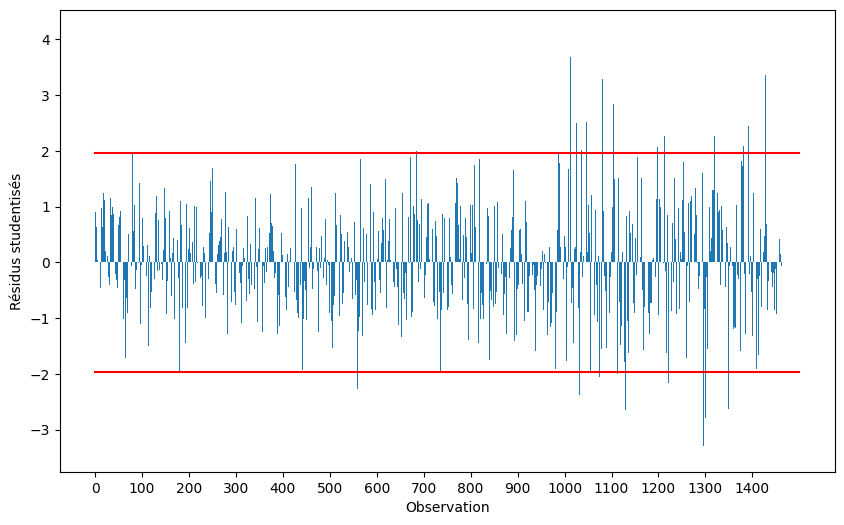

In [54]:
# Repr√©sentation graphique 15

plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['residu_studentise'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('R√©sidus studentis√©s')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [55]:
# D√©finir les seuils

seuil_residu = 2  # R√©sidu studentis√© seuil
seuil_levier = 2 * p / n  # Levier seuil

# Extraire les points aberrants potentiels
points_aberrants = analyses[(analyses['residu_studentise'].abs() > seuil_residu) | (analyses['levier'] > seuil_levier)]

print("Analyses:")
print(analyses)

print("\nPoints aberrants potentiels:")
print(points_aberrants)

print(f"\nSeuil de levier : {seuil_levier}")

Analyses:
       obs    levier  residu_studentise
0        1  0.001516       9.101975e-01
1        2  0.001076      -8.851167e-01
2        3  0.001247       6.405826e-01
3        4  0.001035      -1.244114e+00
4        5  0.004594       3.577397e-02
...    ...       ...                ...
1495  1496  0.005465       3.288727e-14
1496  1497  0.002049       3.064220e-14
1497  1498  0.003325       2.847168e-14
1498  1499  0.002864       3.065473e-14
1499  1500  0.002238       3.064511e-14

[1500 rows x 3 columns]

Points aberrants potentiels:
       obs    levier  residu_studentise
4        5  0.004594       3.577397e-02
10      11  0.001321      -2.288696e+00
48      49  0.007109      -7.113962e-01
52      53  0.010288      -1.188755e+00
54      55  0.004265      -1.967219e-01
...    ...       ...                ...
1466  1467  0.007330      -1.645907e-14
1478  1479  0.005754      -1.315682e-14
1488  1489  0.005375      -1.534670e-14
1494  1495  0.004140       3.067435e-14
1495  1496  0.0

### c.  La distance de Cook

Mesure utilis√©e pour √©valuer l'influence d'une observation individuelle sur les r√©sultats d'un mod√®le de r√©gression. Elle combine √† la fois l'impact de l'observation sur les valeurs ajust√©es et les r√©sidus. Une distance de Cook √©lev√©e indique que l'observation a une influence importante sur le mod√®le et peut √™tre consid√©r√©e comme un point influent ou aberrant.

In [56]:
# Pour trouver la distance de Cook :

influence = reg_multi2.get_influence().summary_frame()

# Le seuil de la distance de Cook est de n-p.

analyses['distance_cook'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

# En g√©n√©ral, une distance de Cook sup√©rieure √† 4/(n-p) est souvent consid√©r√©e comme √©lev√©e

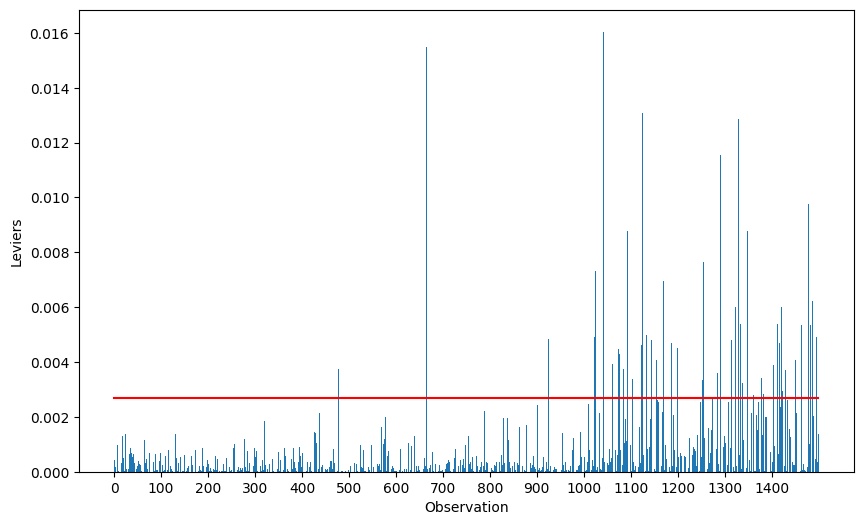

In [57]:
# Observations influentes : G16

plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['distance_cook'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

On ne retire des points qu'apr√®s avoir v√©rifi√© qu'ils sont effectivement atypiques, voire aberrants, au vu du mod√®le estim√©.


In [58]:
# Extraire les points influents potentiels

points_influents = analyses[analyses['distance_cook'] > seuil_dcook]

print("Analyses:")
print(analyses)

print("\nPoints influents potentiels:")
print(points_influents)

print(f"\nSeuil de distance de Cook : {seuil_dcook}")

Analyses:
       obs    levier  residu_studentise  distance_cook
0        1  0.001516       9.101975e-01       0.000419
1        2  0.001076      -8.851167e-01       0.000281
2        3  0.001247       6.405826e-01       0.000171
3        4  0.001035      -1.244114e+00       0.000534
4        5  0.004594       3.577397e-02       0.000002
...    ...       ...                ...            ...
1495  1496  0.005465       3.288727e-14       0.004906
1496  1497  0.002049       3.064220e-14       0.000014
1497  1498  0.003325       2.847168e-14       0.000355
1498  1499  0.002864       3.065473e-14       0.000002
1499  1500  0.002238       3.064511e-14       0.001379

[1500 rows x 4 columns]

Points influents potentiels:
       obs    levier  residu_studentise  distance_cook
52      53  0.010288      -1.188755e+00       0.004896
125    126  0.001167       6.756299e-01       0.006567
239    240  0.001621      -2.180100e-01       0.005156
341    342  0.001651       1.146195e+00       0.003307


## 5.La regression logistique

Mod√©lisation d'une variable qualitative par des variables explicatives.



### 5.1 Mise en place de la regression logistique

In [59]:
# Biblioth√®que

from statsmodels.api import Logit
from statsmodels.discrete.discrete_model import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import cluster, metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [60]:
# Retrait des variables non significatives par la m√©thode Backward

reg_logistiq = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=df_final, family=sm.families.Binomial()).fit()
print(reg_logistiq .summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1493
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.487
Date:                                       Fri, 06 Sep 2024   Deviance:                       78.975
Time:                                               07:46:16   Pearson chi2:                 2.80e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7049
Covariance Type:                                   nonrobust                      

In [61]:
# Nouvelle it√©ration

reg_logistiq = smf.glm('is_genuine~height_left+height_right+margin_low+margin_up+length',
                   data=df_final, family=sm.families.Binomial()).fit()
print(reg_logistiq .summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1494
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.515
Date:                                       Fri, 06 Sep 2024   Deviance:                       79.031
Time:                                               07:46:16   Pearson chi2:                 2.80e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7049
Covariance Type:                                   nonrobust                      

In [62]:
# Nouvelle it√©ration

reg_logistiq = smf.glm('is_genuine~height_right+margin_low+margin_up+length',
                   data=df_final, family=sm.families.Binomial()).fit()
print(reg_logistiq .summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1495
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -40.175
Date:                                       Fri, 06 Sep 2024   Deviance:                       80.351
Time:                                               07:46:16   Pearson chi2:                 3.42e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7046
Covariance Type:                                   nonrobust                      

Il s‚Äôagira de pr√©dire la variable ¬´ is_genuine ¬ª en fonction des 4 variables explicatives ¬´ height_right ¬ª, ¬´ margin_up ¬ª, ¬´ margin_low ¬ª et ¬´ length ¬ª.

Scinder mon dataset en 2 dataset bien distincts, 80%train et 20%test, et apr√®s avoir d√©fini mes variables, cr√©er le mod√®le de r√©gression logistique, que j‚Äôapplique sur mes donn√©es.
Ensuite j‚Äô√©value la performance du mod√®le.


In [63]:
# Valeurs caract√©ristiques et valeur cible

x = df_final [['height_right','margin_low','margin_up','length']]
y = df_final['is_genuine']

In [64]:
# S√©paration du dataset en 2 : TRAIN (80%) et TEST (20%)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=1)
y_test.size

300

In [65]:
# Mod√®le de r√©gression logistique

clf = LogisticRegression(random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [66]:
# Minimiser le biais du mod√®le

clf.score(x_train, y_train)

0.9916666666666667

In [67]:
clf.score(x_test, y_test)

0.9833333333333333

###  5.2 Evaluation de la performance du mod√®le de classification

#### a. La Matrice de confusion

La matrice de confusion nous donne des informations sur la performance de prediction du mod√®le.


In [68]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)

In [69]:
# La matrice de confusion

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 92,   4],
       [  1, 203]])

In [70]:
# Comptage

y_test.value_counts()

is_genuine
True     204
False     96
Name: count, dtype: int64

Text(0.5, 1.0, 'Graphique 17 : Matrice de confusion de la r√©gression logistique\n')

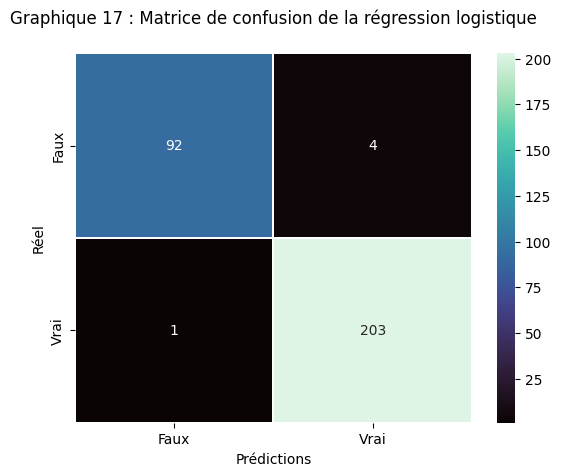

In [71]:
# Repr√©sentation graphique avec labels

sns.heatmap(cnf_matrix,
            annot = True,
            fmt = ".3g",

       cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.title("Graphique 17 : Matrice de confusion de la r√©gression logistique\n")

Sur les 96 faux billets, 92 ont √©t√© correctement pr√©dit(vrais n√©gatifs) soit un taux de prediction de 95,83%.

Les vrais billets qui ont √©te correctement class√©s est de 203 sur les 204 vrais billets de l'echantillon.

Le nombre de faux positif ou le vrais billets de banque qui ont √©t√© classifi√©s comme faux est de 1

Le nombre de faux n√©gatifs ou les faux billets de banque qui ont √©t√© class√©s comme vrai par le mod√®le est de 4.

#### b. Les Metrics

√Ä partir des m√©triques TP, TN, FP, FN, on d√©finit de nombreuses m√©triques adapt√©es √† des probl√©matiques et des interpr√©tations sp√©cifiques, dont l' ‚ÄúExactitude‚Äù, la ‚Äúpr√©cision‚Äù et le ‚Äúrappel‚Äù.

* Exactitude = accuracy = √©chantillons bien class√©s / √©chantillons au total

C'est la capacit√© du mod√®le √† faire de bonnes pr√©dictions.

* La pr√©cision (Precision) = TP / (TP + FP)
La pr√©cision est adapt√©e quand on souhaite minimiser les faux positifs.Un mod√®le avec une forte pr√©cision r√©duit les risques de fausses alertes.
C'est la part des enregistrements r√©ellement positifs(vrais billets) sur les enregistrements positifs pr√©dits.

* Le rappel (Recall) = TP / (TP + FN) (recall en anglais)
Le rappel est adapt√© pour minimiser les faux n√©gatifs, quand les cons√©quences de manquer des instances positives sont graves. Un mod√®le avec un fort rappel r√©duit les risques de rater une d√©tection souhait√©e. C'est la part des vrais billets correctement predits sur le nombre total de vrais billet ou Couverture des observations vraiment positives.



In [72]:
# Quelques crit√®res d'√©valuation du mod√®le

from sklearn.metrics import precision_score, recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Score F1:",F1_score(y_test, y_pred))

Accuracy: 0.9833333333333333
Precision: 0.9806763285024155
Recall: 0.9950980392156863


#### c. Courbe ROC et score AUC

La Courbe ROC ou courbe sensibilit√©/sp√©cificit√©, qui permet d‚Äô√©valuer la qualit√© pr√©dictive du mod√®le, en nous montrant le taux de vrais positifs en fonction du taux de faux positifs. On a un AUC de 1, ce qui repr√©sente un classificateur parfait, tr√®s satisfaisant.

Receiver Operating Characteristic (ou ROC), ou encore fonction d‚Äôefficacit√© du r√©cepteur.

Il s'agit de tracer le rappel ou TPR (true positive rate) par rapport au FPR (false positive rate) en fonction des seuils de classification. Le TPR est d√©fini par TP / (TP + FN) et le FPR est d√©fini par FP /(FP + TN)


Encore appel√©e courbe sensibilit√©/sp√©cificit√©, c'est une mesure de la performance d'un classificateur binaire. Graphiquement, on repr√©sente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs en fonction du taux de faux positifs.

Un score AUC (aire sous la courbe) de 1 repr√©sente un classificateur parfait, tandis qu'un score de 0.5 repr√©sente un classificateur inutile.

In [73]:
# Evaluation de la qualit√© pr√©dictive du mod√®le : Train/ Tracer True positive rate par rapport √† False positive rate

model = LinearRegression()
result = model.fit(x_train, y_train)
y_pred = result.predict(x_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred)
roc_auc_train = auc(fpr_train, tpr_train)

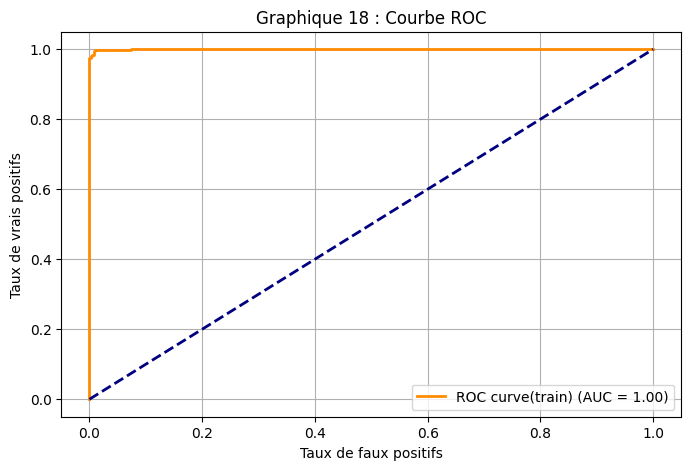

In [74]:
# Courbe ROC et les aires sous la courbe (AUC)

plt.figure(figsize=(8,5))
plt.plot(fpr_train, tpr_train, color ='darkorange', lw=2, label='ROC curve(train) (AUC = %0.2f)' %roc_auc_train)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Graphique 18 : Courbe ROC')
plt.legend(loc ="lower right")
plt.grid()
plt.show()

## 6.Apprentissage non suppervis√©

### 6.1 L'ACP

In [75]:
# Transformation de type de "is_genuine", 'bool' en 'int', soit "True" et "False" en "0" et "1"

df_final['is_genuine'].replace([False,True], [0,1], inplace=True)
df_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [76]:
# Types

df_final.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [77]:
# Normalisation des donn√©es

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Transformation en array Numpy

X = df_final.values

# Standardiser les donn√©es

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

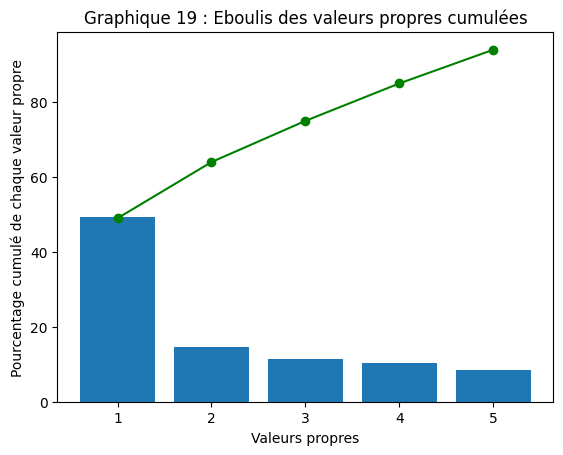

In [78]:
# Eboulis des valeurs propres

n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="green",marker='o')
plt.xlabel("Valeurs propres")
plt.ylabel("Pourcentage cumul√© de chaque valeur propre")
plt.title("Graphique 19 : Eboulis des valeurs propres cumul√©es")
plt.show(block=False)

In [79]:
# Calcul des premi√®res composantes principales
# Pourcentage de variance expliqu√©e

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.49213233 0.14571517 0.11275362 0.10229614 0.08507663]
0.9379738900492124


Le pourcentage de variance expliqu√©e par chacune des composantes : Les 2 premi√®res composantes expliquent environ 64% de la variance observ√©e dans les donn√©es.

Cherchons √† visualiser nos donn√©es sur les 2 premi√®res composantes principales, afin d'avoir une premi√®re vue sur une base orthonorm√©e (en 2D).

In [80]:
# Contribution de chaque variable aux composantes

features = ['is_genuine', 'margin_low', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']

In [81]:
def correlation_graph(pca,
                      x_y,
                      features) :
# Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(9, 7))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les fl√®ches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqu√©
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Graphique 20 : Cercle des corr√©lations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
   # Axes et display
    plt.axis('equal')
    plt.show(block=False)

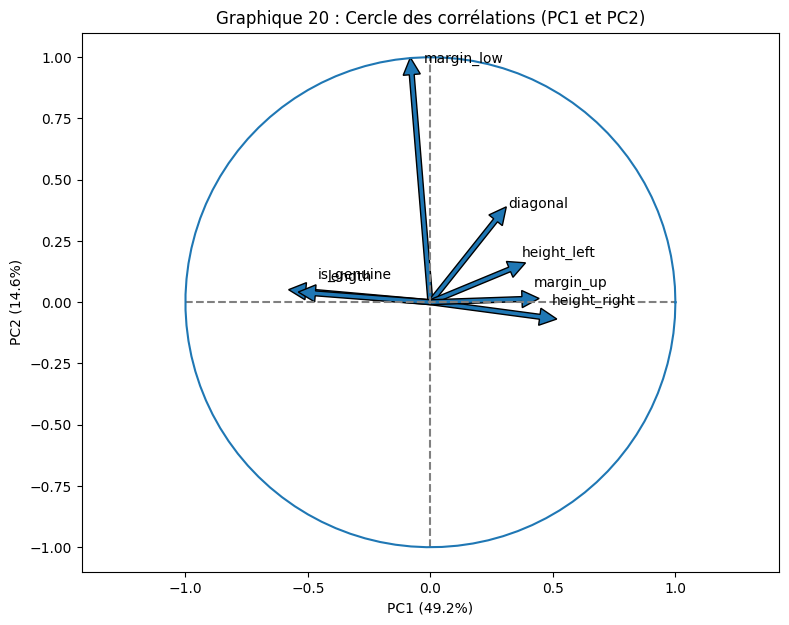

In [82]:
# PC1 et PC2 (~ 50%)

correlation_graph(pca, (0,1), features)

In [83]:
# Corr√©lation PCP et variables

t=pca.components_[:]
df_corr_comp = pd.DataFrame(t, index=[f'PC{i+1}' for i in range(t.shape[0])], columns=features)
df_corr_comp.head()

is_genuine  margin_low  diagonal  height_left  height_right  margin_up  \
PC1   -0.509038   -0.076185  0.266173     0.323535      0.446413   0.373833   
PC2    0.045018    0.929034  0.334538     0.133978     -0.059397   0.012877   
PC3    0.097420   -0.327802  0.891874    -0.044876     -0.095836  -0.236863   
PC4    0.086599   -0.099050 -0.119175     0.912516     -0.076800  -0.328127   
PC5   -0.143248    0.113621 -0.077900    -0.195408      0.476517  -0.802170   

       length  
PC1 -0.469592  
PC2  0.036193  
PC3  0.142522  
PC4  0.149116  
PC5 -0.227535

### 6.2 Le KMeans

In [84]:
from sklearn import preprocessing
np.random.seed(808)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None

Cr√©er un dataset artificiel en 2 dimensions constitu√© de K clusters de N √©chantillons chacun, scikit-learn offre la fonction make_blob().

Par exemple voici 2 "blobs" bien s√©par√©s constitu√©s de 1500 √©chantillons chacun n_samples=1500, centr√©s respectivement aux coordonn√©es centers = [[1, 0], [0, -1]] et d'√©cart type cluster_std=0.7

In [85]:
from sklearn.datasets import make_blobs

centers = [[1, 0], [0, -1]]
X, labels_true = make_blobs(
                      n_samples=1500,
                      centers=centers,
                      cluster_std=0.7)

In [86]:
# Dimension 1500 x 2

X.shape

(1500, 2)

In [87]:
labels_true

array([0, 1, 0, ..., 0, 1, 0])

In [88]:
# De dimension 1500

len(labels_true)

1500

In [89]:
k_means = KMeans( n_clusters=2, random_state = 42, n_init = 'auto')
k_means.fit(X)
print(k_means.cluster_centers_)

[[ 1.03154408  0.07979201]
 [-0.07865099 -1.13131228]]


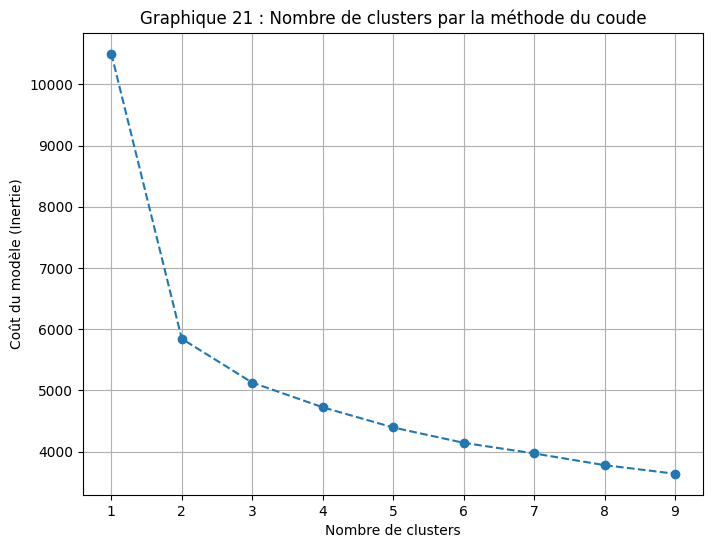

In [90]:
# Recherche du nombre de clusters par la m√©thode du coude

inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(model.inertia_)

# Affichage du graphique de la m√©thode du coude
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Co√ªt du mod√®le (Inertie)')
plt.title('Graphique 21 : Nombre de clusters par la m√©thode du coude')
plt.grid(True)
plt.show()

On peut dire qu'√† 2 clusters, l'ajout de clusters suppl√©mentaires n'apporte plus de gain significatif en termes de r√©duction de l'inertie.

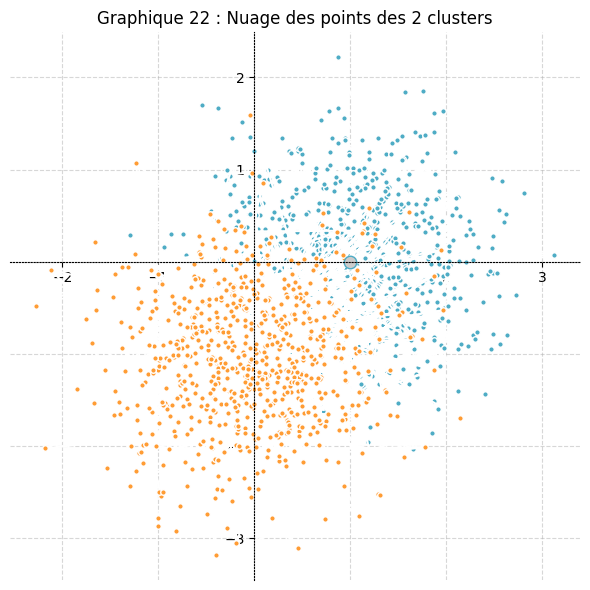

<Figure size 640x480 with 0 Axes>

In [91]:
# Visualisations

centers = [[1, 0], [0, -1]]
X, labels_true = make_blobs(n_samples=1500, centers=centers, cluster_std=0.7)
n_clusters = len(centers)
fig = plt.figure(figsize=(6, 6))
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

ax = fig.add_subplot(1, 1, 1)

ax.set_title("Graphique 22 : Nuage des points des 2 clusters")

for k, col in zip(range(len(centers)), colors):
    my_members = labels_true == k
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker="o", markersize=4, alpha = 1)
for k, col in zip(range(len(centers)), colors):
    ax.plot(
         centers[k][0],
         centers[k][1],
         "o",
         markerfacecolor='#CCC',
         markeredgecolor=col,
        markersize=9,
        )
    # ax.set_title("Original")
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linestyle('dotted')
    ax.spines['left'].set_linestyle('dotted')

    # Customize the appearance of grid lines (dotted and alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

On obtient 2 nuages de points bien distincts.

In [92]:
# Appliquons maintenant l'algorithme du k-means sur ces 2 nuages de points.

from sklearn.cluster import KMeans
k_means = KMeans( n_clusters=2, random_state = 808)
k_means.fit(X)
print(k_means.cluster_centers_)

[[ 1.0841787   0.06435796]
 [-0.13052729 -1.14461552]]


In [93]:
from sklearn import decomposition
from sklearn.cluster import KMeans

# librairies de l'ACP
from sklearn.decomposition import PCA

# librairie pour la sauvegarde du mod√®le
import joblib
from joblib import dump, load

# Options globales pour l'output display:

pd.options.display.float_format = "{:.3f}".format

# Nombre de clusters:

n_clust = 2

# Clustering par K-means:

km = KMeans(n_clusters=n_clust,random_state=1994)
x_km = km.fit_transform(df_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

In [94]:
# Ajout d'une colonne contenant le cluster attribue :

clusters_km = km.labels_
df_final["cluster_km"] = km.labels_
df_final["cluster_km"] = clusters_km
df_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1   171.810      104.860       104.950       4.520      2.890   
1           1   171.460      103.360       103.660       3.770      2.990   
2           1   172.690      104.480       103.500       4.400      2.940   
3           1   171.360      103.910       103.940       3.620      3.010   
4           1   171.730      104.280       103.460       4.040      3.480   

   length  cluster_km  
0 112.830           0  
1 113.090           0  
2 113.160           0  
3 113.510           0  
4 112.540           0

[[171.98684366 103.95183874 103.81357915   4.12270846   3.05818092
  113.1953294 ]
 [171.89863354 104.19312629 104.14503106   5.24120064   3.3479089
  111.59026915]]


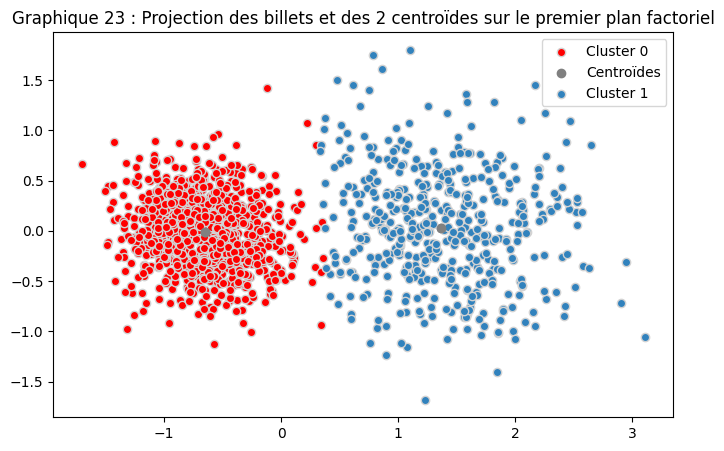

In [95]:
# Clustering par projection des individus sur le premier plan factoriel :

centroids_km = km.cluster_centers_
print(centroids_km)
pca_km = decomposition.PCA(n_components=3).fit(df_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components=3).fit_transform(df_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_km_projected = pca_km.transform(centroids_km)

# Graphique:

plt.figure(figsize=(8, 5))
colormap = np.array(['red', 'blue'])
for couleur,k in zip(['red', "#3182bd"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1],color="grey",label="Centro√Ødes")
plt.title("Graphique 23 : Projection des billets et des {} centro√Ødes sur le premier plan factoriel".format(len(centroids_km)))
plt.show()

### 6.3 Matrice de confusion avec k-means

In [96]:
tableau = pd.crosstab(clusters_km,df_final["is_genuine"])
tableau.index = ['Cluster 0','Cluster 1']
tableau.columns = ['Faux_billets','Vrai_billets']
tableau

Faux_billets  Vrai_billets
Cluster 0            19           998
Cluster 1           481             2

Text(0.5, 1.0, 'Graphique 24 : Matrice de confusion K_means\n')

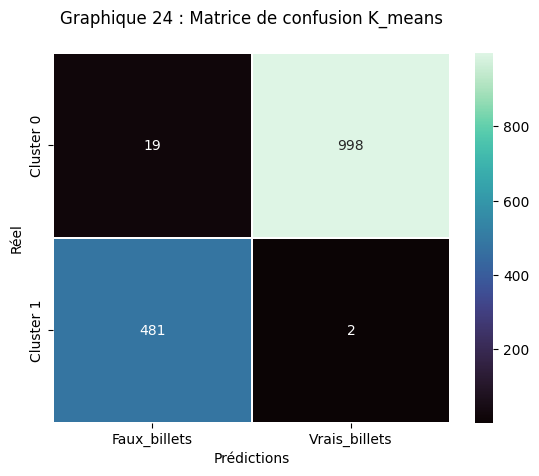

In [97]:
# Carte de chaleur

sns.heatmap(tableau,
            annot = True,
            fmt = ".3g",

       cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux_billets","Vrais_billets"],
            yticklabels=["Cluster 0","Cluster 1"]
            )
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.title("Graphique 24 : Matrice de confusion K_means\n")

### 6.4 Evaluation du mod√®le

In [98]:
accuracy=round(((481+998)/1500)*100,2)
precision=round((998/(998+19))*100,2)
recall=round((998/(2+998))*100,2)
vrai_n√©gatif=round((481/500)*100,2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Vrai n√©gatif:", vrai_n√©gatif)

Accuracy: 98.6
Precision: 98.13
Recall: 99.8
Vrai n√©gatif: 96.2


Le format type de nos fichiers de
billets avec lequel l‚Äôalgorithme est cens√© fonctionner est celui du fichier test billets_production.csv

Il faudra mettre en concurrence les deux m√©thodes de
pr√©diction :

‚óè la r√©gression logistique classique ;

‚óè le k-means, duquel seront utilis√©s les centro√Ødes pour r√©aliser la pr√©diction.

## 7.Comparaison des scores des 2 m√©thodes de pr√©diction

In [99]:
# Remplacez ces valeurs par les scores r√©els

# Scores
reg_log_scores = [0.983, 0.980, 0.995]  # Pour la r√©gression logistique
km_scores = [0.986, 0.981, 0.998]       # Pour KMeans

# Noms des m√©thodes
methods = ['Logistic Regression', 'KMeans']
index = ['Accuracy', 'Precision', 'Recall']

# Cr√©ation du DataFrame
df = pd.DataFrame(index=index, columns=methods)
df['Logistic Regression'] = reg_log_scores
df['KMeans'] = km_scores

# Trouver le score max
max_acc = df.loc['Accuracy'].max()
max_prec = df.loc['Precision'].max()
max_recall = df.loc['Recall'].max()

# Afficher le DataFrame
print(df)
print("\nMax Accuracy:", max_acc)
print("Max Precision:", max_prec)
print("Max Recall:", max_recall)


           Logistic Regression  KMeans
Accuracy                 0.983   0.986
Precision                0.980   0.981
Recall                   0.995   0.998

Max Accuracy: 0.986
Max Precision: 0.981
Max Recall: 0.998


Etant donn√© qu‚Äôon est en dans le cadre des algorithmes supervis√©s du machine learning, nous allons utiliser la r√©gression logistique pour pr√©dire le type de billets du fichier test ¬´ billets_production.csv ¬ª.

## 8.Pr√©diction avec la regression logistique

In [100]:
# Appliquer le mod√®le sur le jeu de test

df_test = pd.read_csv("billets_production.csv", sep=',')
df_test

diagonal  height_left  height_right  margin_low  margin_up  length   id
0   171.760      104.010       103.540       5.210      3.300 111.420  A_1
1   171.870      104.170       104.130       6.000      3.310 112.090  A_2
2   172.000      104.580       104.290       4.990      3.390 111.570  A_3
3   172.490      104.550       104.340       4.440      3.030 113.200  A_4
4   171.650      103.630       103.560       3.770      3.160 113.330  A_5

In [101]:
# S√©lection des features

x = df_test[['height_right', 'margin_low', 'margin_up', 'length']]

In [102]:
# Pr√©diction

prediction = clf.predict(x)
prediction

array([False, False, False,  True,  True])

In [103]:
# Ajouter les pr√©dictions comme nouvelle colonne dans df_test

df_test['prediction'] = prediction
df_test

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0   171.760      104.010       103.540       5.210      3.300 111.420  A_1   
1   171.870      104.170       104.130       6.000      3.310 112.090  A_2   
2   172.000      104.580       104.290       4.990      3.390 111.570  A_3   
3   172.490      104.550       104.340       4.440      3.030 113.200  A_4   
4   171.650      103.630       103.560       3.770      3.160 113.330  A_5   

   prediction  
0       False  
1       False  
2       False  
3        True  
4        True

# Conclusion :
L‚Äôobjectif vis√© par l‚Äô√©quipe data a √©t√© atteint, car j‚Äôai utilis√© la r√©gression lin√©aire multiple pour remplir les valeurs manquantes de notre dataset,

J‚Äôai pr√©dit le type de billet avec une exactitude de 98,33 % avec la r√©gression logistique en Apprentissage supervis√©, et 98,6% avec le KMeans en Apprentissage non supervis√©.


# Ce projet marque la fin de mon parcours de formation "Data analyst" !

Il n'aurait pas √©t√© possible sans l'√©quipe OC, sans le concours de mes promotionnaires, et surtout sans la r√©gion IDF!
Un merci particulier va √† l'endroit de mon Mentor, M. M. Ankarali, qui n'a m√©nag√© aucun effort pour m'accompagner aucours de cette formation, et s'est montr√© toujours disponible quand je le sollicitais.

Merci √† tous !